In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tools import plot_perf,store_hist,add_noise,scale,plot_results
from ModelGen import autoencoder
from MakeData import MakeData
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import load_model

In [3]:
# Importing data
df_test = pd.read_csv('data/test.csv')
df_train = pd.read_csv('data/train.csv')

y = df_train['label']     
X = df_train.drop('label',axis=1)

In [4]:
# Scaling data
X = scale(X)
# Reshaping data
X = X.values.reshape(-1,28,28,1)

In [5]:
X2 = df_train.drop('label',axis=1).values
X2.shape

(42000, 784)

In [6]:
model = autoencoder('Unet')

In [7]:
X_train_noisy, X_test_noisy, X_train, X_test, noise02 = MakeData(X,noise_lvl=0.2)
X_train_noisy05, X_test_noisy05, X_train, X_test, noise05 = MakeData(X,noise_lvl=0.5)

from sklearn.model_selection import train_test_split
X_noisy,noise02 = add_noise(X[0:10000],noise_level=0.2)
X_noisy_train, X_noisy_test, noise_train, noise_test = train_test_split(X_noisy, noise02, test_size=0.2, random_state=101)


In [8]:
X2[0].shape

(784,)

In [9]:
from tensorflow import reduce_mean
from tensorflow.image import ssim
# Custom loss functions

# y_true = target = clean image = X_train
# y_pred = clean output

# max structural similarity index between original image and denoised imaged 
def ssim_loss(y_true, y_pred):
  return 1-reduce_mean(ssim(y_true, y_pred, 1.0, filter_size=5))


# y_true = target = noise 
# y_pred = noisy output
# therefore to get my clean image I need to do y_pred-input 
# need to minimise SSIM between 

# minimise SSIM between removed noise and denoise
def ssim_diff_loss(y_true, y_pred):

  return reduce_mean(ssim(y_true, y_pred, 1.0, filter_size=5))

In [10]:
# AEUnet = autoencoder('Unet')
# AEUnet.compile(loss='binary_crossentropy',optimizer='adam')

# AEUnet_SSIM = autoencoder('Unet')
# AEUnet_SSIM.compile(loss=ssim_loss,optimizer='adam')

# AEUnet05 = autoencoder('Unet')
# AEUnet05.compile(loss='binary_crossentropy',optimizer='adam')

# AEUnet_SSIM05 = autoencoder('Unet')
# AEUnet_SSIM05.compile(loss=ssim_loss,optimizer='adam')

# AEUnet_SSIMv2 = autoencoder('Unet')
# AEUnet_SSIMv2.compile(loss=ssim_loss,optimizer='adam')

# AEUnet_SSIMv2diff = autoencoder('Unet')
# AEUnet_SSIMv2diff.compile(loss='mse',optimizer='adam')

AEANN = autoencoder('ANN')
AEANN.compile(loss='binary_crossentropy',optimizer='adam')

In [11]:
AEANN.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 784)               615440    
_________________________________________________________________
dense_1 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_4 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_5 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_6 (Dense)              (None, 256)               3

In [12]:
callback = EarlyStopping(
    monitor="val_loss",
    min_delta=0.05,
    patience=10,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=True,
)

In [13]:
epochs = 10
batch_size = 128

In [14]:
epochs = 100
batch_size = 128
historyAEANN= AEANN.fit(X_train_noisy.reshape(8000,784), X_train.reshape(8000,784), batch_size = batch_size, epochs = epochs,shuffle=True,validation_data =(X_test_noisy.reshape(2000,784),X_test.reshape(2000,784)),use_multiprocessing=True)

Epoch 1/100
63/63 [==============================] - 2s 27ms/step - loss: 0.3237 - val_loss: 0.2564
Epoch 2/100
63/63 [==============================] - 2s 25ms/step - loss: 0.2390 - val_loss: 0.2164
Epoch 3/100
63/63 [==============================] - 1s 21ms/step - loss: 0.1956 - val_loss: 0.1801
Epoch 4/100
63/63 [==============================] - 1s 21ms/step - loss: 0.1683 - val_loss: 0.1619
Epoch 5/100
63/63 [==============================] - 1s 23ms/step - loss: 0.1549 - val_loss: 0.1524
Epoch 6/100
63/63 [==============================] - 1s 22ms/step - loss: 0.1472 - val_loss: 0.1470
Epoch 7/100
63/63 [==============================] - 1s 23ms/step - loss: 0.1410 - val_loss: 0.1416
Epoch 8/100
63/63 [==============================] - 1s 22ms/step - loss: 0.1364 - val_loss: 0.1376
Epoch 9/100
63/63 [==============================] - 1s 21ms/step - loss: 0.1326 - val_loss: 0.1367
Epoch 10/100
63/63 [==============================] - 1s 21ms/step - loss: 0.1288 - val_loss: 0.1316

In [15]:
# historyUnet_SSIMv2diff = AEUnet_SSIMv2diff.fit(X_train_noisy, noise_train, batch_size = batch_size, epochs = epochs,shuffle=True,validation_data =(X_test_noisy,noise_test),callbacks=callback,use_multiprocessing=True)

In [16]:
# historyUnet_SSIMv2 = AEUnet_SSIMv2.fit(X_train_noisy, X_train, batch_size = batch_size, epochs = epochs,shuffle=True,validation_data =(X_test_noisy,X_test),callbacks=callback,use_multiprocessing=True)

In [17]:
# historyUnet = AEUnet.fit(X_train_noisy, X_train, batch_size = batch_size, epochs = epochs,shuffle=True,
#                     validation_data =(X_test_noisy,X_test),callbacks=callback,use_multiprocessing=True)

In [18]:
# historyUnet_SSIM = AEUnet_SSIM.fit(X_train_noisy, X_train, batch_size = batch_size, epochs = epochs,shuffle=True,
#                     validation_data =(X_test_noisy,X_test),use_multiprocessing=True)

In [19]:
# historyUnet05 = AEUnet05.fit(X_train_noisy05, X_train, batch_size = batch_size, epochs = epochs,shuffle=True,
#                     validation_data =(X_test_noisy05,X_test),callbacks=callback,use_multiprocessing=True)

In [20]:
# historyUnet_SSIM05 = AEUnet_SSIM05.fit(X_train_noisy05, X_train, batch_size = batch_size, epochs = epochs,shuffle=True,
#                     validation_data =(X_test_noisy05,X_test),use_multiprocessing=True)

In [21]:
# # Saving models for loading in eval notebook
# AEUnet.save('./models/AEUnet')
# AEUnet05.save('./models/AEUnet05')
# AEUnet_SSIM.save('./models/AEUnet_SSIM')
# AEUnet_SSIM05.save('./models/AEUnet_SSIM05')
# AEUnet_SSIMv2.save('./models/AEUnet_SSIMv2')
AEANN.save('./models/AEANN')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: ./models/AEANN/assets


In [22]:
# Loading saved models 
AEUnet = load_model('./models/AEUnet')
AEUnet_SSIM = load_model('./models/AEUnet_SSIM',compile=False)
AEUnet_SSIMv2 = load_model('./models/AEUnet_SSIMv2',compile=False)
AEUnet05 = load_model('./models/AEUnet05')
AEUnet_SSIM05 = load_model('./models/AEUnet_SSIM05',compile=False)

In [23]:
# model_hist = pd.DataFrame(historyUnet_SSIMv2.history)
# model_hist['model']='SSIMv2'

NameError: name 'historyUnet_SSIMv2' is not defined

In [24]:
# Predicting
DenoiseAEUnet = AEUnet.predict(X_test_noisy)
DenoiseAEUnet05 = AEUnet05.predict(X_test_noisy05)
DenoiseAEUnet_SSIM = AEUnet_SSIM.predict(X_test_noisy)
DenoiseAEUnet_SSIM05 = AEUnet_SSIM05.predict(X_test_noisy05)
DenoiseAEUnet_SSIMv2 = AEUnet_SSIMv2.predict(X_test_noisy)
DenoiseAEANN = AEANN.predict(X_test_noisy.reshape(2000,784))

In [25]:
DenoiseAEANN = DenoiseAEANN.reshape(-1,28,28,1)

In [26]:
# Differences to noisy images 
DiffAEU = DenoiseAEUnet-X_test_noisy
DiffAEU05 = DenoiseAEUnet05-X_test_noisy05
DiffAEU_SSIM = DenoiseAEUnet_SSIM-X_test_noisy
DiffAEU_SSIM05 = DenoiseAEUnet_SSIM05-X_test_noisy05
DiffAEU_SSIMv2 = DenoiseAEUnet_SSIMv2-X_test_noisy


In [27]:
def plot_results(data,start=0,plot=True,save=False):
    """Input: a list of variables containing MNIST data to plot
              what number in the data you want to start at"""
    
    n = 10

    plt.figure(figsize=(20,len(data)*2))
    # Looping over datasets to compare
    for j in range(len(data)):
        # Looping over numbers in each dataset
        for i in range(start,start+n):
             loc = i-start
             ax = plt.subplot(len(data),n,loc+1+(j*n))
             plt.imshow(data[j][i])
             plt.gray()
             ax.get_xaxis().set_visible(False)
             ax.get_yaxis().set_visible(False)

    if save:
        file_name = input("file name:")
        plt.savefig('./results/images/Unet/%s_start%s.png'%(file_name,start))

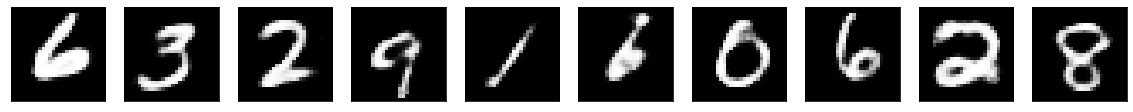

In [29]:
plot_results([DenoiseAEANN],start=20,save=True)